<a href="https://colab.research.google.com/github/scottspurlock/csc4422-2022s/blob/main/labs/lab08_srs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 8: Decision Trees
## Scott Spurlock
### 3/1/2022


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [2]:
# This dataset shows passengers from the Titanic
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1ATf3eoCvAKG_I2luCV2gj_GRDUXoybFR')
df.shape

(891, 12)

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Separate out the target and data
y = df['Survived']
X = df[['Pclass', 'Sex', 'SibSp', 'Parch']]
X = pd.get_dummies(X)
X.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1


### Divide the data into randomized training and test partitions. Use 10% of the data as the test set, keeping 90% for training.

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=0)
Xtest[0:5]

,Pclass,SibSp,Parch,Sex_female,Sex_male
495,3,0,0,0,1
648,3,0,0,0,1
278,3,4,1,0,1
31,1,1,0,1,0
255,3,0,2,1,0


#### Now let's make a decision tree

In [6]:
# Make a tree object
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fit a model to the training data
clf = clf.fit(Xtrain, ytrain)
clf

DecisionTreeClassifier(criterion='entropy', random_state=0)

Visualize the tree


In [7]:
classes = ['survived_false', 'survived_true']

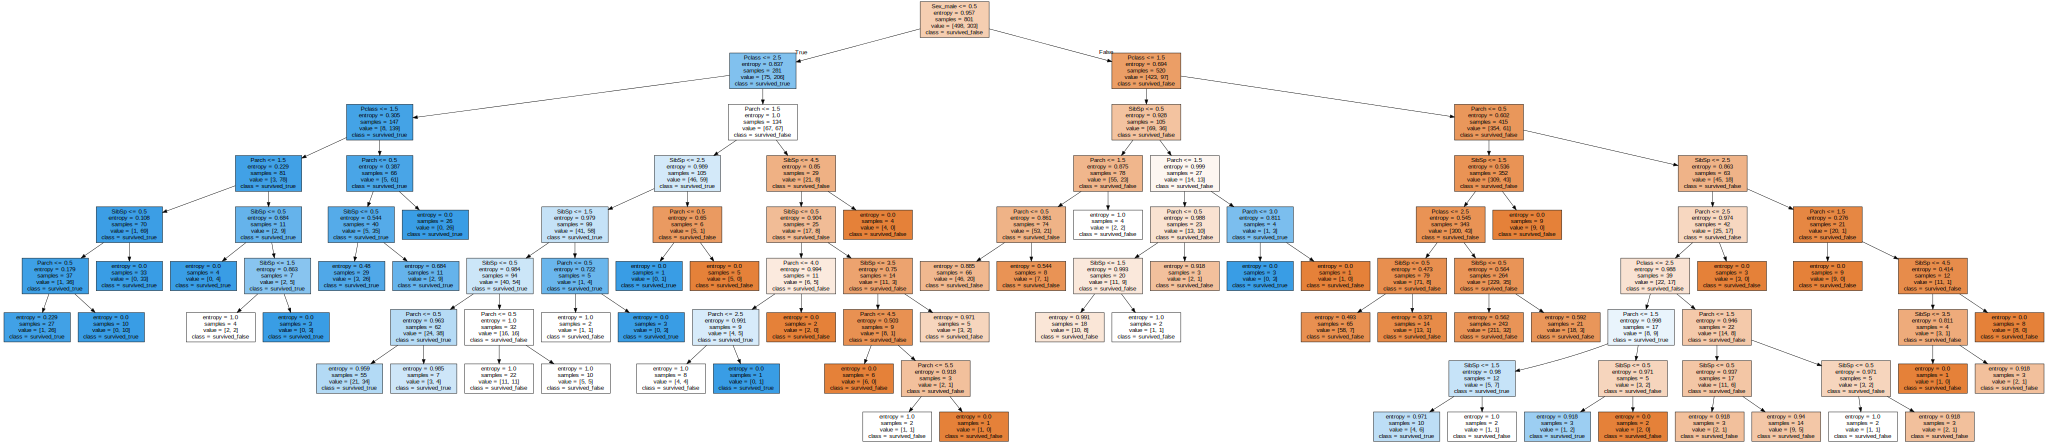

In [8]:
vis_data = export_graphviz(clf, out_file=None,
                feature_names=Xtrain.columns,
                class_names=['survived_false', 'survived_true'],
                filled=True)

graph = graphviz.Source(vis_data) 
graph

## Interpreting the tree
The top node splits on the sex attribute, suggesting that this is an important attribute to predict whether a passenger survived.

The leaf node with the largest number of samples and 0 entropy includes 33 passengers who survived. To see what attributes they had in common, we can trace the path from the leaf node up the tree to the root. These passengers had no siblings or spouses aboard and less than 1.5 parents or children. They were in first class and female.


### How well does the model predict the training data?

In [9]:
print('Training accuracy:')
ypred = clf.predict(Xtrain)
print(classification_report(ytrain, ypred))

Training accuracy:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       498
           1       0.85      0.63      0.72       303

    accuracy                           0.82       801
   macro avg       0.83      0.78      0.79       801
weighted avg       0.82      0.82      0.81       801



### How well does the model predict the test data?

In [10]:

ypred = clf.predict(Xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        51
           1       0.78      0.64      0.70        39

    accuracy                           0.77        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.77      0.77      0.76        90



### The accuracy on the training data is only a bit better than on the test data, so the model is overfitting, but not too badly.

## Confusion Matrix

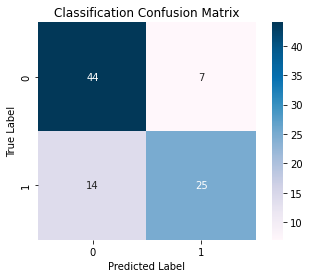

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, ypred)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu",
                    xticklabels=clf.classes_,
                    yticklabels=clf.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Classification Confusion Matrix')
plt.show()

## Mistakes
The model is worst when the true label is 1 (pasenger survived), with a recall of 64%.

## See if limiting max depth can help overfitting

In [12]:
from sklearn.metrics import accuracy_score

for d in range(1, 10):
    # Make a tree object
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=0)

    # Fit a model to the training data
    clf = clf.fit(Xtrain, ytrain)

    # See how well the model predicts the training data
    ypred = clf.predict(Xtrain)
    # acc_train = np.sum(ypred == ytrain) / len(ypred)
    acc_train = accuracy_score(ytrain, ypred)

    # See how well the model predicts the test data
    ypred = clf.predict(Xtest)
    # acc_test = np.sum(ypred == ytest) / len(ypred)
    acc_test = accuracy_score(ytest, ypred)

    print(f'max_depth = {d}: train accuracy {acc_train:.2f}, test accuracy {acc_test:.2f}')


max_depth = 1: train accuracy 0.79, test accuracy 0.80
max_depth = 2: train accuracy 0.79, test accuracy 0.80
max_depth = 3: train accuracy 0.80, test accuracy 0.81
max_depth = 4: train accuracy 0.81, test accuracy 0.80
max_depth = 5: train accuracy 0.81, test accuracy 0.80
max_depth = 6: train accuracy 0.81, test accuracy 0.79
max_depth = 7: train accuracy 0.82, test accuracy 0.77
max_depth = 8: train accuracy 0.82, test accuracy 0.77
max_depth = 9: train accuracy 0.82, test accuracy 0.77


## Overfitting
Notice that as max depth increases (the decision tree model gets more complicated) the training accuracy goes up a bit, but the test accuracy falls, suggesting that the model is starting to overfit. We get the highest accuracy on the test data (which is what we care about) when max depth is 3.

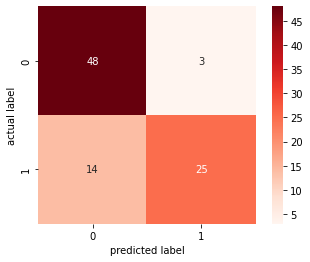

In [13]:
# Show final results with best model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf = clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap='Reds',
            xticklabels=clf.classes_,
            yticklabels=clf.classes_)
plt.xlabel('predicted label')
plt.ylabel('actual label');
